# Unsupervised Learning

In [ ]:
#공통 모듈 임포트
import numpy as np
import os

#노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

#깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

#그림을 저장할 위치
PROJECT_ROOT_DIR="."
CHAPTER_ID="unsupervised_learning"
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

#불필요한 경고를 무시
import warnings
warnings.filterwarnings(action="ignore",message="^internal gelsd")

## 군집

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data=load_iris()
X=data.data
y=data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

분류 vs 군집

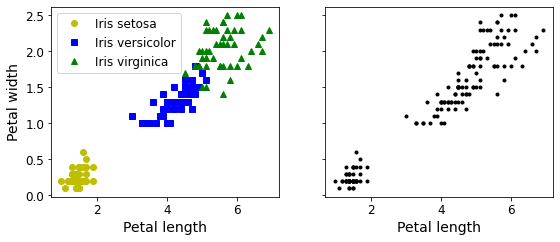

In [ ]:
plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y==0,2],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1,2],X[y==1,3],"bs",label="Iris versicolor")
plt.plot(X[y==2,2],X[y==2,3],"g^",label="Iris virginica")
plt.xlabel("Petal length",fontsize=14)
plt.ylabel("Petal width",fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:,2],X[:,3],c="k",marker=".")
plt.xlabel("Petal length",fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

가우시안 혼합 모델은 3개의 클러스터를 잘 나눈다.  
(꽃잎 길이와 너비, 꽃받침 길이와 너비 4개의 특성을 모두 사용)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
y_pred=GaussianMixture(n_components=3,random_state=42).fit(X).predict(X)
mapping_index=[np.argmax(np.bincount(y_pred[n:n+50]))for n in range(0,150,50)]
mapping={mapping_index[i]:i for i in [0,1,2]}
y_pred=np.array([mapping[cluster_id]for cluster_id in y_pred])

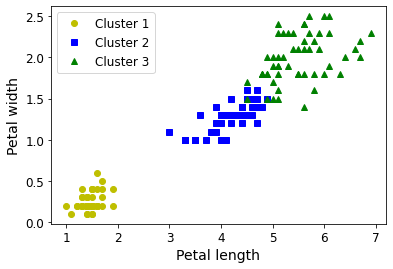

In [ ]:
plt.plot(X[y_pred==0,2],X[y_pred==0,3],"yo",label="Cluster 1")
plt.plot(X[y_pred==1,2],X[y_pred==1,3],"bs",label="Cluster 2")
plt.plot(X[y_pred==2,2],X[y_pred==2,3],"g^",label="Cluster 3")
plt.xlabel("Petal length",fontsize=14)
plt.ylabel("Petal width",fontsize=14)
plt.legend(loc="upper left",fontsize=12)
plt.show()

In [ ]:
np.sum(y_pred==y)

145

In [ ]:
np.sum(y_pred==y)/len(y_pred)

0.9666666666666667

### k-평균

예제 데이터를 생성 :

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
blob_centers=np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]]
)
blob_std=np.array([0.4,0.3,0.1,0.1,0.1])

In [ ]:
X,y=make_blobs(n_samples=2000,centers=blob_centers,
               cluster_std=blob_std,random_state=7)

데이터를 그래프로 :

In [ ]:
def plot_clusters(X,y=None):
  plt.scatter(X[:,0],X[:,1],c=y,s=1)
  plt.xlabel("$x_1$",fontsize=14)
  plt.ylabel("$x_2$",fontsize=14,rotation=0)

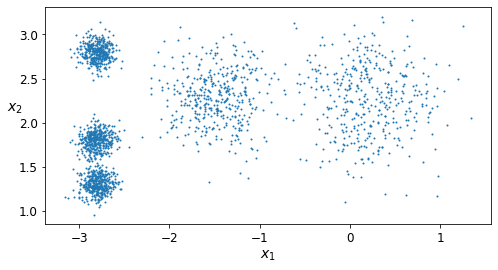

In [ ]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

훈련과 예측  
이 데이터셋에 K-평균 군집 알고리즘을 훈련  
이 알고리즘은 클러스터 중심을 찾고 각 샘플을 가까운 클러스터에 할당 :

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(X)

각 샘플은 5개의 클러스터 중 하나에 할당 :

In [ ]:
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

5개의 센트로이드 (i.e. 클러스터 중심) :

In [ ]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

KMeans 객체는 훈련한 샘플의 레이블을 가지고 있다.  
여기에서 샘플의 레이블은 샘플에 할당한 클러스터의 인덱스 :

In [ ]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

새로운 샘플의 레이블을 예측 :

In [ ]:
X_new=np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

결정 경계  
(이 그림은 보로노이 다이어그램이 된다) :

In [ ]:
def plot_data(X):
  plt.plot(X[:,0],X[:,1],'k.',markersize=2)

def plot_centroids(centroids,weights=None,circle_color='w',cross_color='k'):
  if weights is not None:
    centroids=centroids[weights>weights.max()/10]
  plt.scatter(centroids[:,0],centroids[:,1],
              marker='o',s=30,linewidths=8,
              color=circle_color,zorder=10,alpha=0.9)
  plt.scatter(centroids[:,0],centroids[:,1],
              marker='x',s=50,
              color=cross_color,zorder=11,alpha=1)

def plot_decision_boundaries(clusterer,X,resolution=1000,show_centroids=True,
                             show_xlabels=True,show_ylabels=True):
  mins=X.min(axis=0)-0.1
  maxs=X.max(axis=0)+0.1
  xx,yy=np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                    np.linspace(mins[1],maxs[1],resolution))
  Z=clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)

  plt.contourf(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),
               cmap="Pastel2")
  plt.contour(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),
              linewidths=1,colors='k')
  plot_data(X)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)

  if show_xlabels:
    plt.xlabel("$x_1$",fontsize=14)
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabels:
    plt.ylabel("$x_2$",fontsize=14,rotation=0)
  else:
    plt.tick_params(labelleft=False)

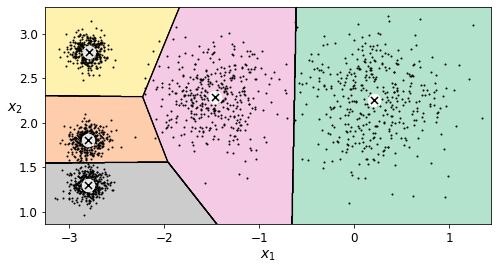

In [ ]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans,X)
plt.show()

경계 근처에 있는 일부 샘플은 아마도 잘못 클러스터에 할당된 것 같지만 전반적으로 좋은 것 같다.

하드 군집 vs 소프트 군집  
하드 군집은 각 샘플에 대해 가장 가까운 클러스터를 선택  
대신 샘플에서 5개의 센트로이드까지 거리를 측정하는 것이 나을 수도 있다.

In [ ]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

이 거리가 샘플과 센트로이드 사이의 유클리드 거리인지 확인 :

In [ ]:
np.linalg.norm(np.tile(X_new,(1,k)).reshape(-1,k,2)-kmeans.cluster_centers_,axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

K-평균 알고리즘  
K-평균 알고리즘은 가장 빠른 군집 알고리즘 중 하나이지만 가장 간단한 알고리즘 중 하나 :

- 먼저 k개의 센트로이드를 랜덤하게 초기화 : 데이터셋에서 k개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓는다.
- 수렴할 때까지 다음을 반복 (i.e. 센트로이드가 더이상 이동하지 않을 때까지) :
  - 각 샘플을 가장 가까운 센트로이드에 할당
  - 센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트

K-평균 알고리즘을 1,2,3회 반복하고 센트로이드가 어떻게 움직이는지 확인 :

In [ ]:
kmeans_iter1=KMeans(n_clusters=5,init="random",n_init=1,
                    algorithm="full",max_iter=1,random_state=9)
kmeans_iter2=KMeans(n_clusters=5,init="random",n_init=1,
                    algorithm="full",max_iter=2,random_state=9)
kmeans_iter3=KMeans(n_clusters=5,init="random",n_init=1,
                    algorithm="full",max_iter=3,random_state=9)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=9,
       tol=0.0001, verbose=0)

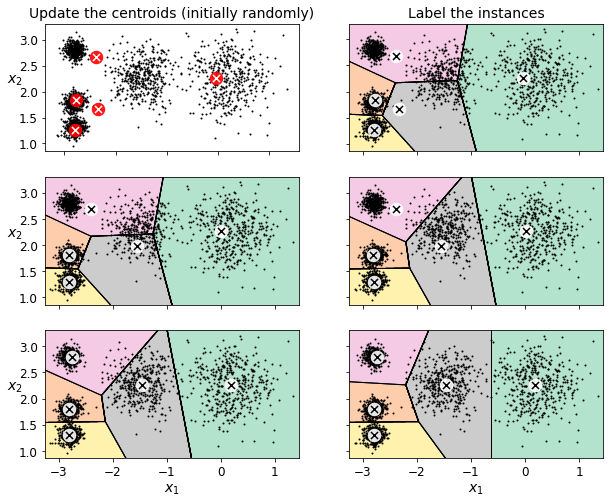

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color='r',cross_color='w')
plt.ylabel("$x_2$",fontsize=14,rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)",fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X,show_xlabels=False,show_ylabels=False)
plt.title("Label the instances",fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1,X,show_centroids=False,show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2,X,show_xlabels=False,show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2,X,show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3,X,show_ylabels=False)

plt.show()

K-평균의 변동성  
원래 K-평균 알고리즘에서는 센트로이드가 랜덤하게 초기화되고 알고리즘은 단순히 한번씩 반복하여 앞서 본 것처럼 점차 센트로이드를 개선  
하지만 이 방식의 문제점은 K-평균을 여러번 (또는 다른 랜덤 시드로) 실행하면 아래에서 보이듯이 매우 다른 결과를 얻게 된다 :

In [ ]:
def plot_clusterer_comparison(clusterer1,clusterer2,X,title1=None,title2=None):
  clusterer1.fit(X)
  clusterer2.fit(X)

  plt.figure(figsize=(10,3.2))

  plt.subplot(121)
  plot_decision_boundaries(clusterer1,X)
  if title1:
    plt.title(title1,fontsize=14)

  plt.subplot(122)
  plot_decision_boundaries(clusterer2,X,show_ylabels=False)
  if title2:
    plt.title(title2,fontsize=14)

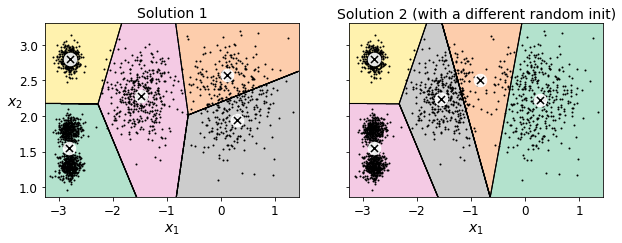

In [ ]:
kmeans_rnd_init1=KMeans(n_clusters=5,init="random",n_init=1,
                        algorithm="full",random_state=42)
kmeans_rnd_init2=KMeans(n_clusters=5,init="random",n_init=1,
                        algorithm="full",random_state=51)

plot_clusterer_comparison(kmeans_rnd_init1,kmeans_rnd_init2,X,
                          "Solution 1","Solution 2 (with a different random init)")

plt.show()

이너셔  
최선의 모델을 선택하려면 K-평균 모델의 성능을 평가할 방법이 있어야 한다.  
군집은 비지도 학습이기 때문에 타깃이 없지만 각 샘플과 센트로이드 사이의 거리는 측정할 수 있다.

In [ ]:
kmeans.inertia_

211.5985372581684

이너셔는 각 훈련 샘플과 가장 가까운 센트로이드 사이의 제곱 거리의 합으로 쉽게 검증 :

In [ ]:
X_dist=kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)),kmeans.labels_]**2)

211.59853725816856

score() 메서드는 음의 이너셔를 반환  
항상 '큰 값이 좋은 것' 규칙을 따라야 하기 때문

In [ ]:
kmeans.score(X)

-211.59853725816856

다중 초기화  
변동성 이슈를 해결하는 한 방법은 단순히 K-평균 알고리즘을 랜덤 초기화를 다르게 하여 여러 번 실행하고 가장 작은 이너셔를 만드는 솔루션을 선택  
예를 들어 앞선 그림에 있는 엉터리 모델 두 개의 이너셔는 다음과 같다.

In [ ]:
kmeans_rnd_init1.inertia_

219.48142731436425

In [ ]:
kmeans_rnd_init2.inertia_

236.6351925965028

앞서 훈련한 모델보다 이너셔가 더 높다. (i.e. 더 나쁘다는 것을 의미)  
n_init 매개변수를 지정하면 사이킷런은 원래 알고리즘을 n_init번 실행하고 이너셔가 가장 작은 솔루션을 선택 (이 매개변수의 기본값은 n_init=10)

In [ ]:
kmeans_rnd_10_inits=KMeans(n_clusters=5,init="random",n_init=10,
                           algorithm="full",random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

처음 만들었던 모델을 얻었으므로 이 모델이 최적의 K-평균 결과로 보인다. (k=5라고 가정하고 이너셔를 기준을 했을 때)

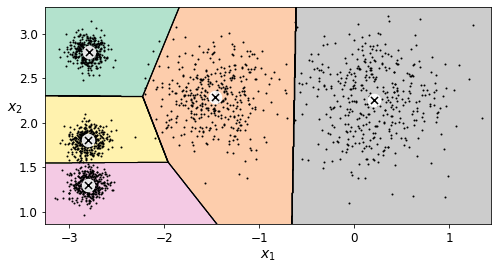

In [ ]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_10_inits,X)
plt.show()

K-평균++

- 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c_1$을 선택
- $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$의 확률로 샘플 $\mathbf{x}_i$를 새로운 센트로이드 $c_i$로 선택  
여기에서 $D(\mathbf{x}_i)$는 샘플 $\mathbf{x}_i$에서 이미 선택된 가장 가까운 센트로이드까지 거리  
이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 센트로이드로 선택할 가능성을 높인다.
- $k$ 개의 센트로이드를 선택할 때까지 이전 단계를 반복

센트로이드를 완전히 랜덤하게 초기화하는 대신 위의 알고리즘을 사용해 초기화  
K-평균++ 알고리즘의 나머지는 일반 K-평균  
이 초기화 방식을 사용하면 K-평균 알고리즘이 최적의 솔루션에 수렴할 가능성이 높아진다.  
따라서 n_init 값을 상당히 줄일 수 있다. (대부분의 경우 n_init를 줄이는 것이 초기화 과정에 추가된 복잡도를 보상)  
K-평균++ 초기화를 사용하려면 간단하게 init="k-means++"로 지정 (사실 이 값이 기본값) :

In [ ]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
good_init=np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans=KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

K-평균 속도 개선  
K-평균 알고리즘은 불필요한 거리 계산을 많이 피하는 식으로 속도를 높일 수 있다.  
이를 위해 삼각 부등식을 사용 (3개의 포인트 A, B, C가 있을 때, 거리 AC는 항상 AC ≤ AB + BC를 만족)  
그리고 샘플과 센트로이드 사이 거리의 최솟값과 최댓값을 유지  
Elkan의 K-평균 방식을 사용하려면 algorithm="elkan"으로 설정 (이 방법은 희소 행렬을 지원하지 않는다.)  
따라서 사이킷런은 밀집 배열에는 "elkan"을 사용하고 희소 행렬에는 (기본 K-평균 알고리즘인) "full"을 사용


In [ ]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

50 loops, best of 3: 88.6 ms per loop


In [ ]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

50 loops, best of 3: 124 ms per loop


미니배치 K-평균  
사이킷런은 미니배치를 지원하는 K-평균 방식도 제공 :

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minibatch_kmeans=MiniBatchKMeans(n_clusters=5,random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
minibatch_kmeans.inertia_

211.93186531476775

데이터셋이 메모리에 다 들어가지 못하면 간단한 방법은 memmap 클래스를 사용하는 것

In [ ]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',version=1)
mnist.target=mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,t_test=train_test_split(mnist["data"],mnist["target"],random_state=42)

memmap에 데이터를 기록 :

In [ ]:
filename="my_mnist.data"
X_mm=np.memmap(filename,dtype='float32',mode='write',shape=X_train.shape)
X_mm[:]=X_train

In [ ]:
minibatch_kmeans=MiniBatchKMeans(n_clusters=10,batch_size=10,random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

데이터가 너무 커서 memmap을 사용할 수 없다면 문제는 더 복잡해진다.  
배치를 로드하는 함수를 먼저 만들어 본다 (실전에서는 디스크에서 데이터를 로드) :

In [ ]:
def load_next_batch(batch_size):
  return X[np.random.choice(len(X),batch_size,replace=False)]

한 번에 하나의 배치를 모델에 주입하여 훈련  
또한 여러 번 초기화를 수행하고 이너셔가 가장 낮은 모델을 선택 :

In [ ]:
np.random.seed(42)

In [ ]:
k=5
n_init=10
n_iterations=100
batch_size=100
init_size=500 #K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters=10

best_kmeans=None

for init in range(n_init):
  minibatch_kmeans=MiniBatchKMeans(n_clusters=k,init_size=init_size)
  X_init=load_next_batch(init_size)
  minibatch_kmeans.partial_fit(X_init)

  minibatch_kmeans.sum_inertia_=0
  for iteration in range(n_iterations):
    X_batch=load_next_batch(batch_size)
    minibatch_kmeans.partial_fit(X_batch)
    if iteration>=n_iterations-evaluate_on_last_n_iters:
      minibatch_kmeans.sum_inertia_+=minibatch_kmeans.inertia_

  if (best_kmeans is None or minibatch_kmeans.sum_inertia_<best_kmeans.sum_inertia_):
    best_kmeans=minibatch_kmeans

In [ ]:
best_kmeans.score(X)

-211.70999744411483

미니배치 K-평균이 일반 K-평균보다 빠르다 :

In [ ]:
%timeit KMeans(n_clusters=5).fit(X)

10 loops, best of 3: 48.5 ms per loop


In [ ]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

10 loops, best of 3: 29.4 ms per loop


빠르지만 성능이 낮은 (i.e. 이너셔가 높은) 경우가 많다. (k가 증가할수록 더)  
미니배치 K-평균과 일반 K-평균 사이에 이너셔와 훈련 시간을 그래프로 :

In [ ]:
from timeit import timeit

In [ ]:
times=np.empty((100,2))
inertias=np.empty((100,2))
for k in range(1,101):
  kmeans_=KMeans(n_clusters=k,random_state=42)
  minibatch_kmeans=MiniBatchKMeans(n_clusters=k,random_state=42)
  print("\r{}/{}".format(k,100),end="")
  times[k-1,0]=timeit("kmeans_.fit(X)",number=10,globals=globals())
  times[k-1,1]=timeit("minibatch_kmeans.fit(X)",number=10,globals=globals())
  inertias[k-1,0]=kmeans_.inertia_
  inertias[k-1,1]=minibatch_kmeans.inertia_

100/100

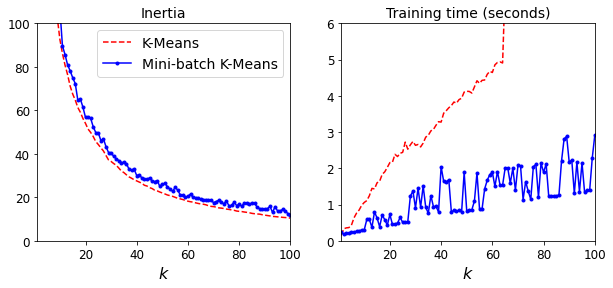

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1,101),inertias[:,0],"r--",label="K-Means")
plt.plot(range(1,101),inertias[:,1],"b.-",label="Mini-batch K-Means")
plt.xlabel("$k$",fontsize=16)
plt.title("Inertia",fontsize=14)
plt.legend(fontsize=14)
plt.axis([1,100,0,100])

plt.subplot(122)
plt.plot(range(1,101),times[:,0],"r--",label="K-Means")
plt.plot(range(1,101),times[:,1],"b.-",label="Mini-batch K-Means")
plt.xlabel("$k$",fontsize=16)
plt.title("Training time (seconds)",fontsize=14)
plt.axis([1,100,0,6])

plt.show()

최적의 클러스터 개수 찾기  
*클러스터 개수가 5보다 작거나 크다면?*

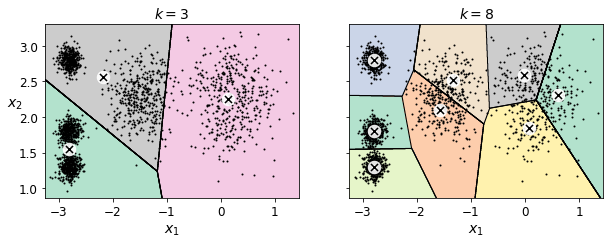

In [ ]:
kmeans_k3=KMeans(n_clusters=3,random_state=42)
kmeans_k8=KMeans(n_clusters=8,random_state=42)

plot_clusterer_comparison(kmeans_k3,kmeans_k8,X,"$k=3$","$k=8$")
plt.show()

두 모델 모두 좋아 보이지 않는다.  
*이너셔는?*

In [ ]:
kmeans_k3.inertia_

653.2167190021553

In [ ]:
kmeans_k8.inertia_

118.41983763508077

k가 증가할수록 이너셔가 줄어들기 때문에 단순히 이너셔가 작은 k를 선택할 수 없다.  
실제 클러스터가 많을수록 샘플은 인접한 센트로이드에 더 가깝기 때문에 이너셔가 더 작다.  
*k에 대한 이너셔를 그래프로 그리고 결과 그래프를 조사해보면?*

In [ ]:
kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(X)for k in range(1,10)]
inertias=[model.inertia_ for model in kmeans_per_k]

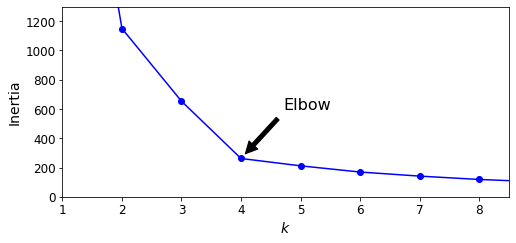

In [ ]:
plt.figure(figsize=(8,3.5))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.annotate('Elbow',
             xy=(4,inertias[3]),
             xytext=(0.55,0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black',shrink=0.1)
             )
plt.axis([1,8.5,0,1300])
plt.show()

k=4에서 엘보우이며 이 값보다 클러스터가 작으면 나쁘다는 뜻 (이보다 더 많아도 크게 도움이 되지 않는다.)  
왼쪽 아래 두 클러스터가 하나의 클러스터로 간주되었지만 꽤 좋은 군집 결과

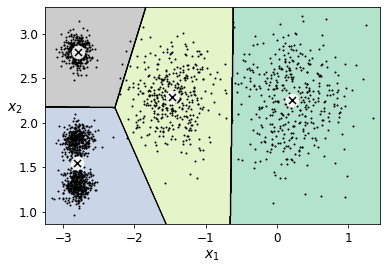

In [ ]:
plot_decision_boundaries(kmeans_per_k[4-1],X)
plt.show()

또 다른 방법은 모든 샘플에 대한 실루엣 계수의 평균인 실루엣 점수  
한 샘플의 실루엣 계수는 $(b - a)/\max(a, b)$  
여기에서 $a$는 같은 클러스터에 있는 다른 샘플까지의 평균 거리 (클러스트 내부 평균 거리)  
$b$는 가장 가까운 클러스터까지 평균 거리  (i.e. 샘플 자신의 클러스터를 제외하고 $b$를 최소화하는 클러스터의 샘플까지 평균 거리)  
실루엣 계수는 -1에서 +1 사이 값을 가진다.  
+1에 가까우면 샘플이 다른 클러스터로부터 떨어져 자신의 클러스터 안에 잘 있다는 것을 의미  
0에 가까우면 클러스터 경계에 가깝다는 의미  
-1에 가까우면 샘플이 잘못된 클러스터에 할당되었을지 모른다.  
k에 대한 실루엣 점수를 그래프로 :

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X,kmeans.labels_)

0.655517642572828

In [ ]:
silhouette_scores=[silhouette_score(X,model.labels_)for model in kmeans_per_k[1:]]

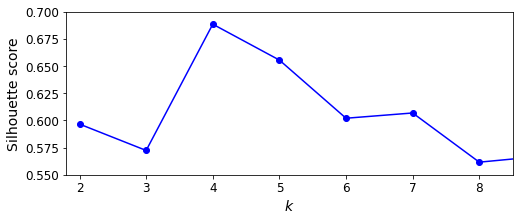

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(range(2,10),silhouette_scores,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14)
plt.axis([1.8,8.5,0.55,0.7])
plt.show()

정보가 더 풍부 (k=4가 매우 좋은 선택이지만 k=5도 꽤 괜찮은 선택)  
모든 샘플의 실루엣 계수를 할당된 클러스터와 실루엣 값으로 정렬하여 그리면 많은 정보를 얻을 수 있다 (실루엣 다이어그램) :

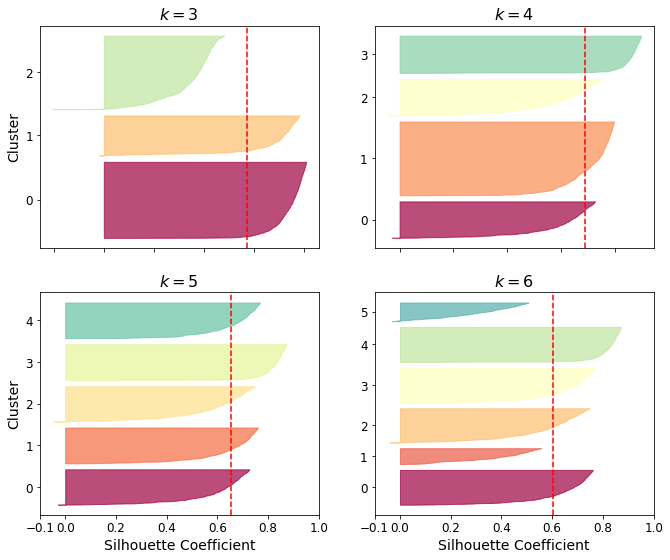

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator,FixedFormatter

plt.figure(figsize=(11,9))

for k in (3,4,5,6):
  plt.subplot(2,2,k-2)

  y_pred=kmeans_per_k[k-1].labels_
  silhouette_coefficients=silhouette_samples(X,y_pred)

  padding=len(X)//30
  pos=padding
  ticks=[]
  for i in range(k):
    coeffs=silhouette_coefficients[y_pred==i]
    coeffs.sort()

    color=mpl.cm.Spectral(i/k)
    plt.fill_betweenx(np.arange(pos,pos+len(coeffs)),0,coeffs,
                      facecolor=color,edgecolor=color,alpha=0.7)
    ticks.append(pos+len(coeffs)//2)
    pos+=len(coeffs)+padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3,5):
    plt.ylabel("Cluster")

  if k in(5,6):
    plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    plt.xlabel("Silhouette Coefficient")
  else:
    plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores[k-2],color="red",linestyle="--")
  plt.title("$k={}$".format(k),fontsize=16)

plt.show()

### k-평균의 한계

In [ ]:
X1,y1=make_blobs(n_samples=1000,centers=((4,-4),(0,0)),random_state=42)
X1=X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2=make_blobs(n_samples=250,centers=1,random_state=42)
X2=X2+[6,-8]
X=np.r_[X1,X2]
y=np.r_[y1,y2]

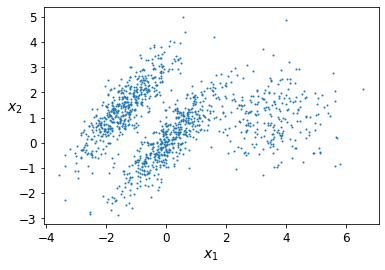

In [ ]:
plot_clusters(X)

In [ ]:
kmeans_good=KMeans(n_clusters=3,init=np.array([[-1.5,2.5],[0.5,0],[4,0]]),n_init=1,random_state=42)
kmeans_bad=KMeans(n_clusters=3,random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

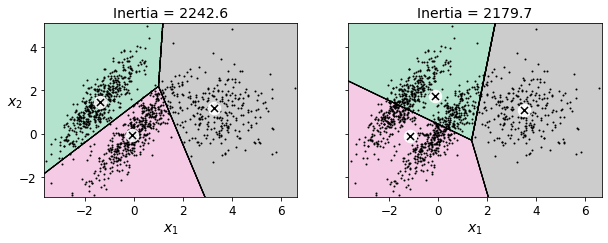

In [ ]:
plt.figure(figsize=(10,3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_),fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X,show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_),fontsize=14)

plt.show()

### 군집을 사용한 이미지 분할

In [ ]:
import urllib.request

#무당벌레 이미지를 다운로드
images_path=os.path.join(PROJECT_ROOT_DIR,"images","unsupervised_learning")
os.makedirs(images_path,exist_ok=True)
DOWNLOAD_ROOT="https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename="ladybug.png"
print("Downloading",filename)
url=DOWNLOAD_ROOT+"images/unsupervised_learning/"+filename
urllib.request.urlretrieve(url,os.path.join(images_path,filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f433ca36860>)

In [ ]:
from matplotlib.image import imread
image=imread(os.path.join(images_path,filename))
image.shape

(533, 800, 3)

In [ ]:
X=image.reshape(-1,3)
kmeans=KMeans(n_clusters=8,random_state=42).fit(X)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(image.shape)

In [ ]:
segmented_imgs=[]
n_colors=(10,8,6,4,2)
for n_clusters in n_colors:
  kmeans=KMeans(n_clusters=n_clusters,random_state=42).fit(X)
  segmented_img=kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

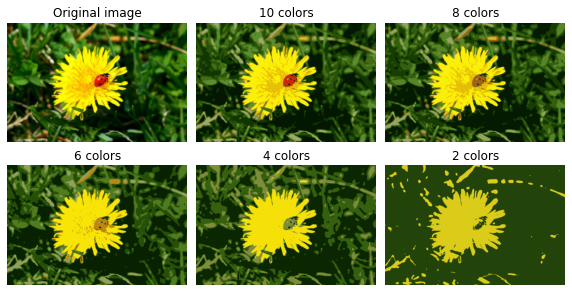

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05,hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx,n_clusters in enumerate(n_colors):
  plt.subplot(232+idx)
  plt.imshow(segmented_imgs[idx])
  plt.title("{} colors".format(n_clusters))
  plt.axis('off')

plt.show()

### 군집을 사용한 전처리

MNIST와 유사하게 숫자 0에서 9까지 8x8 흑백 이미지 1,797개로 이루어진 숫자 데이터셋을 다루어 본다.

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X_digits,y_digits=load_digits(return_X_y=True)

훈련 세트와 테스트 세트로 :

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_digits,y_digits,random_state=42)

로지스틱 회귀 모델을 훈련하고 테스트 세트에서 평가 :

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(X_test,y_test)

0.9688888888888889

기본 모델의 정확도는 96.89%로 좋다.  
K-평균을 전처리 단계로 사용해 더 향상할 수 있는지 알아 본다.  
훈련 세트를 50개의 클러스터로 만들고 이미지를 이 클러스터까지 거리로 바꾼 다음 로지스틱 회귀 모델을 적용하는 파이프라인을 만든다 :

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline=Pipeline([
                   ("kmeans",KMeans(n_clusters=50,random_state=42)),
                   ("log_reg",LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42)),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pipeline.score(X_test,y_test)

0.98

In [ ]:
1-(1-0.977777)/(1-0.968888)

0.28570969400874346

클러스터 개수 k를 임의로 결정해서 오차율을 28%나 줄였다.  
K-평균을 분류 파이프라인에서 전처리 단계로 사용했기 때문에 실루엣 분석을 수행하거나 이너셔를 최소화할 필요 없이 가장 좋은 분류 성능을 내는 k값을 찾는다.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=dict(kmeans__n_clusters=range(2,100))
grid_clf=GridSearchCV(pipeline,param_grid,cv=3,verbose=2)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 25.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

최고의 클러스터 개수를 확인 :

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [ ]:
grid_clf.score(X_test,y_test)

0.98

### 군집을 사용한 준지도 학습

군집의 또 다른 사용처는 레이블이 없는 샘플이 많고 레이블이 있는 샘플이 적을 때 사용하는 준지도 학습  
레이블을 가진 샘플이 50개만 있을 때 로지스틱 회귀 모델의 성능을 확인 :

In [ ]:
n_labeled=50

In [ ]:
log_reg=LogisticRegression(multi_class="ovr",solver="lbfgs",random_state=42)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.8333333333333334

먼저 훈련 세트를 클러스터 50개로 군집  
그다음 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾는다 (대표 이미지) :

In [ ]:
k=50

In [ ]:
kmeans=KMeans(n_clusters=k,random_state=42)
X_digits_dist=kmeans.fit_transform(X_train)
representative_digit_idx=np.argmin(X_digits_dist,axis=0)
X_representative_digits=X_train[representative_digit_idx]

대표 이미지를 출력하고 수동으로 레이블을 매겨 본다 :

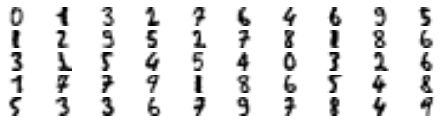

In [ ]:
plt.figure(figsize=(8,2))
for index,X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k//10,10,index+1)
  plt.imshow(X_representative_digit.reshape(8,8),cmap="binary",interpolation="bilinear")
  plt.axis('off')

plt.show()

In [ ]:
y_representative_digits=np.array([
                                  0,1,3,2,7,6,4,6,9,5,
                                  1,2,9,5,2,7,8,1,8,6,
                                  3,1,5,4,5,4,0,3,2,6,
                                  1,7,7,9,1,8,6,5,4,8,
                                  5,3,3,6,7,9,7,8,4,9
])

이 데이터셋은 레이블이 있는 샘플이 50개뿐이지만 랜덤한 샘플이 아니라 각 샘플은 클러스터의 대표 이미지  
성능이 더 나은지 확인 :

In [ ]:
log_reg=LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42)
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

0.9244444444444444

성능이 확 오르고 여전히 50개의 샘플로만 모델을 훈련  
샘플에 레이블을 다는 것은 비용이 많이 들고 어려운 작업 (특히 전문가가 수동으로 작업할 때)  
이 때 랜덤한 샘플보다는 대표 샘플에 레이블을 다는 것이 좋은 생각  
성능을 더 향상시킬 수 있다.  
*이 레이블을 같은 클러스터에 있는 다른 모든 샘플에 전파한다면?*

In [ ]:
y_train_propagated=np.empty(len(X_train),dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]

In [ ]:
log_reg=LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42)
log_reg.fit(X_train,y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(X_test,y_test)

0.9377777777777778

정확도를 조금 높였다.  
전체 클러스터에 전파하면 일부 이상치를 포함하기 때문에 센트로이드에 가까운 샘플에만 레이블을 전파하는 것이 나을지 모른다.  
레이블을 센트로이드에 가까운 20번째 백분위수까지만 전파 :

In [ ]:
percentile_closest=20

X_cluster_dist=X_digits_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
  in_cluster=(kmeans.labels_==i)
  cluster_dist=X_cluster_dist[in_cluster]
  cutoff_distance=np.percentile(cluster_dist,percentile_closest)
  above_cutoff=(X_cluster_dist>cutoff_distance)
  X_cluster_dist[in_cluster&above_cutoff]=-1

In [ ]:
partially_propagated=(X_cluster_dist!=-1)
X_train_partially_propagated=X_train[partially_propagated]
y_train_partially_propagated=y_train_propagated[partially_propagated]

In [ ]:
log_reg=LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42)
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(X_test,y_test)

0.9222222222222223

레이블된 샘플 50개(클래스당 평균 5개 샘플)만 가지고 레이블된 전체 숫자 데이터셋에서 훈련한 로지스틱 회귀의 성능과 비슷  
이는 전파된 레이블이 실제로 좋기 때문 (이 정확도는 거의 99%)

In [ ]:
np.mean(y_train_partially_propagated==y_train[partially_propagated])

0.9896193771626297

능동 학습을 여러 번 반복할 수 있다 :
1. 분류기의 확신이 부족한 샘플에 수동으로 레이블을 부여 (가능하면 다른 클러스터에서 샘플을 선택)
1. 추가된 레이블을 사용해 새로운 모델을 훈련

### DBSCAN

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X,y=make_moons(n_samples=1000,noise=0.05,random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
len(dbscan.core_sample_indices_)

808

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2=DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
def plot_dbscan(dbscan,X,size,show_xlabels=True,show_ylabels=True):
  core_mask=np.zeros_like(dbscan.labels_,dtype=bool)
  core_mask[dbscan.core_sample_indices_]=True
  anomalies_mask=dbscan.labels_==-1
  non_core_mask=~(core_mask|anomalies_mask)

  cores=dbscan.components_
  anomalies=X[anomalies_mask]
  non_cores=X[non_core_mask]

  plt.scatter(cores[:,0],cores[:,1],c=dbscan.labels_[core_mask],
              marker='o',s=size,cmap="Paired")
  plt.scatter(cores[:,0],cores[:,1],marker='*',s=20,c=dbscan.labels_[core_mask])
  plt.scatter(anomalies[:,0],anomalies[:,1],c="r",marker="x",s=100)
  plt.scatter(non_cores[:,0],non_cores[:,1],c=dbscan.labels_[non_core_mask],marker=".")
  if show_xlabels:
    plt.xlabel("$x_1$",fontsize=14)
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabels:
    plt.ylabel("$x_2$",fontsize=14,rotation=0)
  else:
    plt.tick_params(labelleft=False)
  plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps,dbscan.min_samples),fontsize=14)

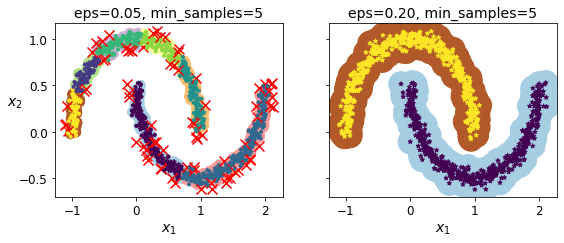

In [ ]:
plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_dbscan(dbscan,X,size=100)

plt.subplot(122)
plot_dbscan(dbscan2,X,size=600,show_ylabels=False)

plt.show()

In [ ]:
dbscan=dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
X_new=np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

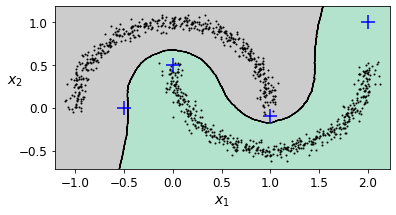

In [ ]:
plt.figure(figsize=(6,3))
plot_decision_boundaries(knn,X,show_centroids=False)
plt.scatter(X_new[:,0],X_new[:,1],c="b",marker="+",s=200,zorder=10)
plt.show()

In [ ]:
y_dist,y_pred_idx=knn.kneighbors(X_new,n_neighbors=1)
y_pred=dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2]=-1
y_pred.ravel()

array([-1,  0,  1, -1])

### 다른 군집 알고리즘

스펙트럼 군집

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
sc1=SpectralClustering(n_clusters=2,gamma=100,random_state=42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [ ]:
sc2=SpectralClustering(n_clusters=2,gamma=1,random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [ ]:
np.percentile(sc1.affinity_matrix_,95)

0.04251990648936265

In [ ]:
def plot_spectral_clustering(sc,X,size,alpha,show_xlabels=True,show_ylabels=True):
  plt.scatter(X[:,0],X[:,1],marker='o',s=size,c='gray',cmap="Paired",alpha=alpha)
  plt.scatter(X[:,0],X[:,1],marker='o',s=30,c='w')
  plt.scatter(X[:,0],X[:,1],marker='.',s=10,c=sc.labels_,cmap="Paired")

  if show_xlabels:
    plt.xlabel("$x_1$",fontsize=14)
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabels:
    plt.ylabel("$x_2$",fontsize=14,rotation=0)
  else:
    plt.tick_params(labelleft=False)
  plt.title("RBF gamma={}".format(sc.gamma),fontsize=14)

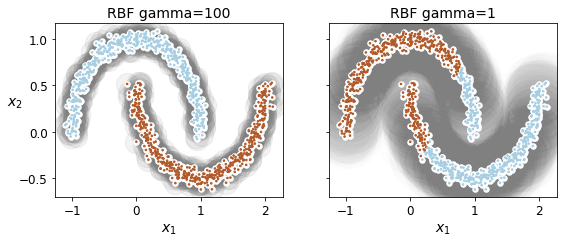

In [ ]:
plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_spectral_clustering(sc1,X,size=500,alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2,X,size=4000,alpha=0.01,show_ylabels=False)

plt.show()

병합 군집

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
X=np.array([0,2,5,8.5]).reshape(-1,1)
agg=AgglomerativeClustering(linkage="complete").fit(X)

In [ ]:
def learned_parameters(estimator):
  return [attrib for attrib in dir(estimator)if attrib.endswith("_")and not attrib.startswith("_")]

In [ ]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_components_',
 'n_connected_components_',
 'n_leaves_']

In [ ]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

## 가우시안 혼합

In [ ]:
X1,y1=make_blobs(n_samples=1000,centers=((4,-4),(0,0)),random_state=42)
X1=X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2=make_blobs(n_samples=250,centers=1,random_state=42)
X2=X2+[6,-8]
X=np.r_[X1,X2]
y=np.r_[y1,y2]

이 데이터셋으로 가우시안 혼합 모델을 훈련 :

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm=GaussianMixture(n_components=3,n_init=10,random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

EM 알고리즘이 추정한 파라미터를 확인 :

In [ ]:
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [ ]:
gm.means_

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [ ]:
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

*이 알고리즘이 실제로 수렴했나?*

In [ ]:
gm.converged_

True

*몇 번 반복?*

In [ ]:
gm.n_iter_

4

이 모델을 사용해 각 샘플이 속한 클러스터(하드 군집)나 클러스터에 속할 확률을 예측 :

In [ ]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(X)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

이 모델은 생성 모델이라 새로운 샘플(과 레이블)을 생성할 수 있다 :

In [ ]:
X_new,y_new=gm.sample(6)
X_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [ ]:
y_new

array([0, 0, 1, 1, 1, 2])

각 클러스터에서 순서대로 샘플링되었다.  
확률 밀도 함수(PDF)를 추정할 수도 있다.

In [ ]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

전체 공간에 대해 이 PDF를 적분하면 1이 되는지 확인
- 클러스터 주위로 큰 사각형을 정하고 작은 사각형의 그리드로 자른다.
- 그다음 작은 사각형에서 샘플이 생성될 확률의 근삿값을 계산 (작은 사각형의 면적과 PDF를 곱하고 이 확률을 모두 더한다.)

결괏값은 1에 매우 가깝다 :

In [ ]:
resolution=100
grid=np.arange(-10,10,1/resolution)
xx,yy=np.meshgrid(grid,grid)
X_full=np.vstack([xx.ravel(),yy.ravel()]).T

pdf=np.exp(gm.score_samples(X_full))
pdf_probas=pdf*(1/resolution)**2
pdf_probas.sum()

0.9999999999225099

만들어진 결정 경계(파선)와 밀도 등고선 :

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer,X,resolution=1000,show_ylabels=True):
  mins=X.min(axis=0)-0.1
  maxs=X.max(axis=0)+0.1
  xx,yy=np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                    np.linspace(mins[1],maxs[1],resolution))
  Z=-clusterer.score_samples(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,
               norm=LogNorm(vmin=1.0,vmax=30.0),
               levels=np.logspace(0,2,12))
  plt.contour(xx,yy,Z,
              norm=LogNorm(vmin=1.0,vmax=30.0),
              levels=np.logspace(0,2,12),
              linewidths=1,colors='k')

  Z=clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)
  plt.contour(xx,yy,Z,
              linewidths=2,colors='r',linestyles='dashed')

  plt.plot(X[:,0],X[:,1],'k.',markersize=2)
  plot_centroids(clusterer.means_,clusterer.weights_)

  plt.xlabel("$x_1$",fontsize=14)
  if show_ylabels:
    plt.ylabel("$x_2$",fontsize=14,rotation=0)
  else:
    plt.tick_params(labelleft=False)

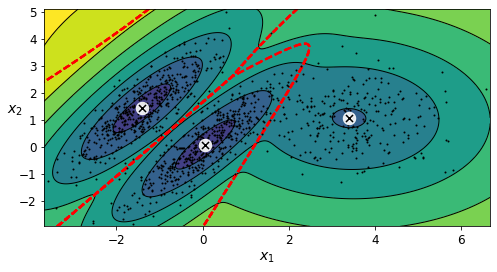

In [ ]:
plt.figure(figsize=(8,4))

plot_gaussian_mixture(gm,X)

plt.show()

covariance_type 매개변수를 사용해 이 알고리즘이 찾을 공분산 행렬을 제한
- "full"(기본값) : 제약이 없다. 모든 클러스터가 어떤 크기의 타원도 될 수 있다.
- "tied" : 모든 클러스터가 동일하지만 어떤 타원도 가능 (i.e. 공분산 행렬을 공유)
- "spherical" : 모든 클러스터가 원형이지만 지름은 다를 수 있다. (i.e. 분산이 다르다.)
- "diag" : 클러스터는 어떤 크기의 타원도 될 수 있지만 타원은 축에 나란해야 한다. (i.e. 공분산 행렬이 대각 행렬)

In [ ]:
gm_full=GaussianMixture(n_components=3,n_init=10,covariance_type="full",random_state=42)
gm_tied=GaussianMixture(n_components=3,n_init=10,covariance_type="tied",random_state=42)
gm_spherical=GaussianMixture(n_components=3,n_init=10,covariance_type="spherical",random_state=42)
gm_diag=GaussianMixture(n_components=3,n_init=10,covariance_type="diag",random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
def compare_gaussian_mixtures(gm1,gm2,X):
  plt.figure(figsize=(9,4))

  plt.subplot(121)
  plot_gaussian_mixture(gm1,X)
  plt.title('covariance_type="{}"'.format(gm1.covariance_type),fontsize=14)

  plt.subplot(122)
  plot_gaussian_mixture(gm2,X,show_ylabels=False)
  plt.title('covariance_type="{}"'.format(gm2.covariance_type),fontsize=14)

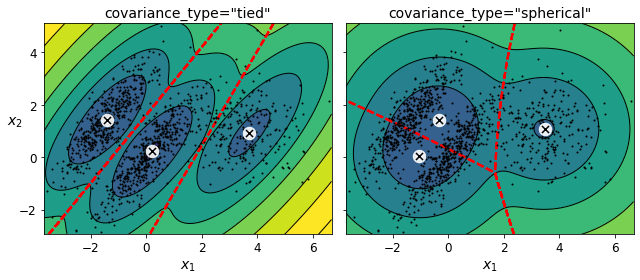

In [ ]:
compare_gaussian_mixtures(gm_tied,gm_spherical,X)
plt.tight_layout()
plt.show()

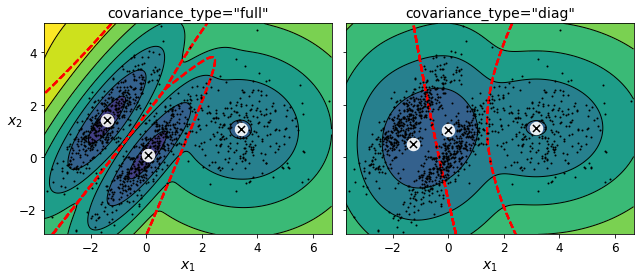

In [ ]:
compare_gaussian_mixtures(gm_full,gm_diag,X)
plt.tight_layout()
plt.show()

사이킷런 예제 :  
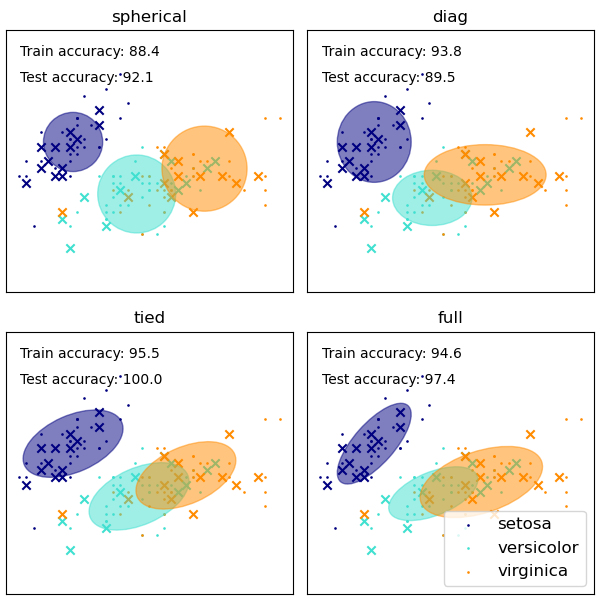

### 가우시안 혼합을 사용한 이상치 탐지

가우시안 혼합을 이상치 탐지에 사용할 수 있다 : 밀도가 낮은 지역에 있는 샘플을 이상치로 생각할 수 있다.  
밀도 임곗값을 지정하고 임계 밀도보다 낮은 지역에 있는 샘플을 얻는다 :

In [ ]:
densities=gm.score_samples(X)
density_threshold=np.percentile(densities,4)
anomalies=X[densities<density_threshold]

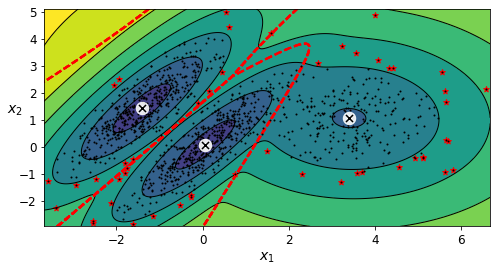

In [ ]:
plt.figure(figsize=(8,4))

plot_gaussian_mixture(gm,X)
plt.scatter(anomalies[:,0],anomalies[:,1],color='r',marker='*')
plt.ylim(top=5.1)

plt.show()

### 클러스터 개수 선택하기

이너셔나 실루엣 점수는 모두 원형 클러스터를 가정하기 때문에 가우시안 혼합 모델에 사용할 수 없다.  
BIC(Bayesian Information Criterion)나 AIC(Akaike Information Criterion)같은 이론적 정보 기준을 최소화하는 모델을 찾을 수 있다 :  
${BIC} = {\log(m)p - 2\log({\hat L})}$  
${AIC} = 2p - 2\log(\hat L)$  
- $m$은 샘플의 개수
- $p$는 모델이 학습할 파라미터 개수
- $\hat L$은 모델의 가능도 함수의 최댓값 (이는 모델과 최적의 파라미터가 주어졌을 때 관측 데이터 $\mathbf{X}$의 조건부 확률)

BIC와 AIC 모두 모델이 많은 파라미터(e.g. 많은 클러스터)를 학습하지 못하도록 제한  
그리고 데이터에 잘 맞는 모델(i.e. 관측 데이터에 가능도가 높은 모델)에 보상을 준다.

In [ ]:
gm.bic(X)

8189.733705221635

In [ ]:
gm.aic(X)

8102.508425106597

BIC를 수동으로 계산 :

In [ ]:
n_clusters=3
n_dims=2
n_params_for_weights=n_clusters-1
n_params_for_means=n_clusters*n_dims
n_params_for_covariance=n_clusters*n_dims*(n_dims+1)//2
n_params=n_params_for_weights+n_params_for_means+n_params_for_covariance
max_log_likelihood=gm.score(X)*len(X) #log(L^)
bic=np.log(len(X))*n_params-2*max_log_likelihood
aic=2*n_params-2*max_log_likelihood

In [ ]:
bic,aic

(8189.733705221635, 8102.508425106597)

In [ ]:
n_params

17

클러스터마다 하나의 가중치가 있지만 모두 더하면 1 (따라서 자유도는 1이 줄어든다.)  
비슷하게 $n \times n$ 공분산 행렬의 자유도는 $n^{2}$가 아니라 $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$  
여러 가지 k 값에 대해 가우시안 혼합 모델을 훈련하고 BIC를 측정 :

In [ ]:
gms_per_k=[GaussianMixture(n_components=k,n_init=10,random_state=42).fit(X)for k in range(1,11)]

In [ ]:
bics=[model.bic(X)for model in gms_per_k]
aics=[model.aic(X)for model in gms_per_k]

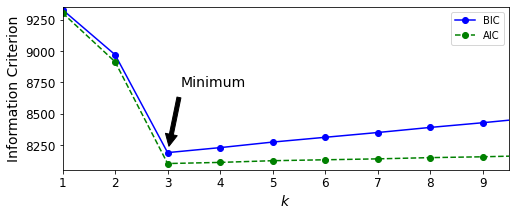

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(range(1,11),bics,"bo-",label="BIC")
plt.plot(range(1,11),aics,"go--",label="AIC")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Information Criterion",fontsize=14)
plt.axis([1,9.5,np.min(aics)-50,np.max(aics)+50])
plt.annotate('Minimum',
             xy=(3,bics[2]),
             xytext=(0.35,0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black',shrink=0.1))
plt.legend()
plt.show()

클러스터 개수와 covariance_type 하이퍼파라미터의 최적 조합 :

In [ ]:
min_bic=np.infty

for k in range(1,11):
  for covariance_type in ("full","tied","spherical","diag"):
    bic=GaussianMixture(n_components=k,n_init=10,
                        covariance_type=covariance_type,
                        random_state=42).fit(X).bic(X)
    if bic<min_bic:
      min_bic=bic
      best_k=k
      best_covariance_type=covariance_type

In [ ]:
best_k

3

In [ ]:
best_covariance_type

'full'

### 베이즈 가우시안 혼합 모델

최적의 클러스터 개수를 수동으로 찾는 대신 불필요한 클러스터의 가중치를 0으로 (또는 0에 가깝게) 만들 수 있다.  
최적의 클러스터 개수보다 큰 컴포넌트의 개수를 지정하면 이 알고리즘은 자동으로 불필요한 클러스터를 제거 :

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

In [ ]:
bgm=BayesianGaussianMixture(n_components=10,n_init=10,random_state=42)
bgm.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

알고리즘이 자동으로 3개의 컴포넌트가 필요하다는 것을 감지 :

In [ ]:
np.round(bgm.weights_,2)

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

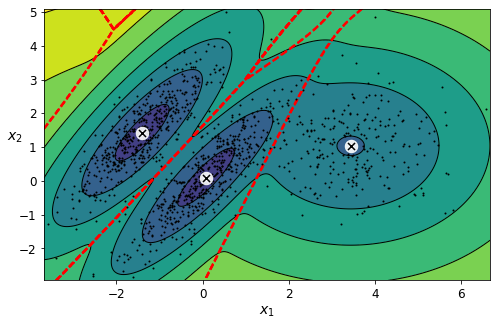

In [ ]:
plt.figure(figsize=(8,5))
plot_gaussian_mixture(bgm,X)
plt.show()

In [ ]:
bgm_low=BayesianGaussianMixture(n_components=10,max_iter=1000,n_init=1,
                                weight_concentration_prior=0.01,random_state=42)
bgm_high=BayesianGaussianMixture(n_components=10,max_iter=1000,n_init=1,
                                 weight_concentration_prior=10000,random_state=42)
nn=73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

In [ ]:
np.round(bgm_low.weights_,2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
np.round(bgm_high.weights_,2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

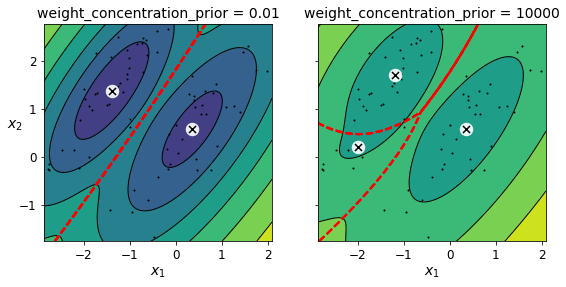

In [ ]:
plt.figure(figsize=(9,4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low,X[:nn])
plt.title("weight_concentration_prior = 0.01",fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high,X[:nn],show_ylabels=False)
plt.title("weight_concentration_prior = 10000",fontsize=14)

plt.show()

In [ ]:
X_moons,y_moons=make_moons(n_samples=1000,noise=0.05,random_state=42)

In [ ]:
bgm=BayesianGaussianMixture(n_components=10,n_init=10,random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

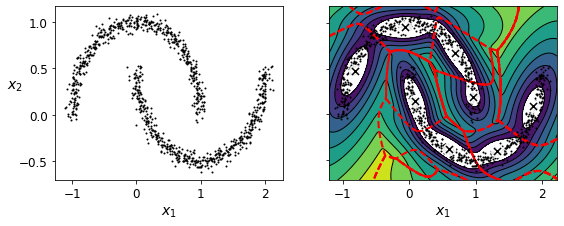

In [ ]:
plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$",fontsize=14)
plt.ylabel("$x_2$",fontsize=14,rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm,X_moons,show_ylabels=False)

plt.show()

반달 모양 클러스터 2개를 감지하는 대신 이 알고리즘은 8개의 타원 클러스터를 감지했기에 좋지 않다.  
하지만 밀도 그래프는 나쁘지 않기 때문에 이상치 탐지에 사용할 수 있다.